In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio, display
import os


In [3]:
def load_and_play_audio(file_path):
    y, sr = librosa.load(file_path, sr=None)
    print(f"Loaded '{file_path}' (Sample Rate: {sr} Hz)")
    display(Audio(y, rate=sr))
    return y, sr

# Usage example:
y, sr = load_and_play_audio('../data/raw/audio/Yes_approve.opus')
def plot_waveform(y, sr, title="Waveform"):
    plt.figure(figsize=(14, 5))
    librosa.display.waveshow(y, sr=sr)
    plt.title(title)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.show()

Loaded '../data/raw/audio/Yes_approve.opus' (Sample Rate: 16000 Hz)


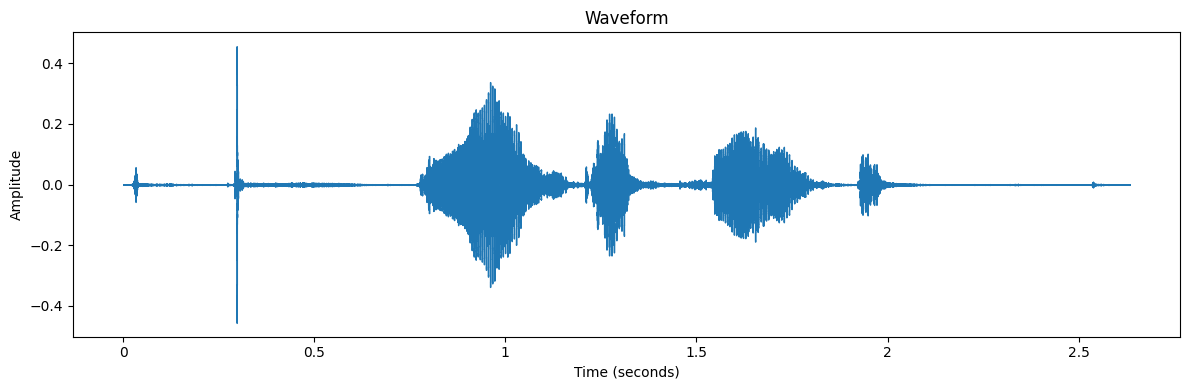

In [4]:
def plot_waveform(y, sr, title="Waveform"):
    plt.figure(figsize=(12, 4))
    librosa.display.waveshow(y, sr=sr)
    plt.title(title)
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")
    plt.tight_layout()
    plt.show()

# Usage example:
plot_waveform(y, sr)


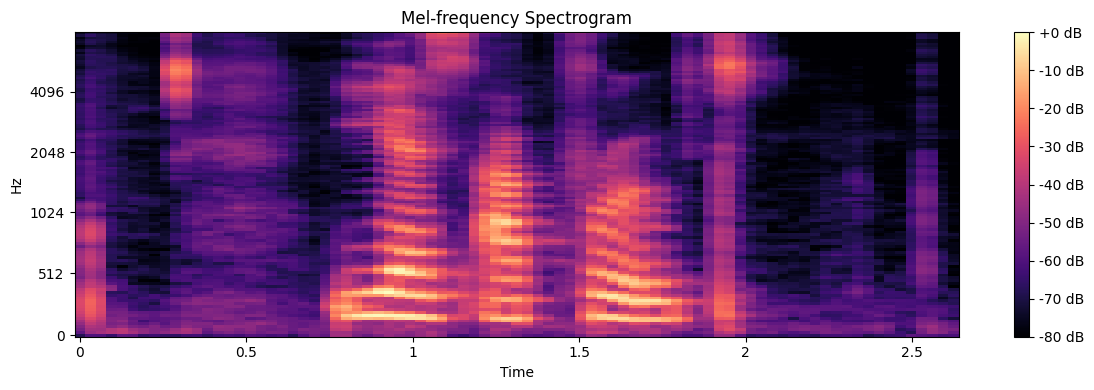

In [5]:
def plot_mel_spectrogram(y, sr, title="Mel-frequency Spectrogram"):
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    S_dB = librosa.power_to_db(S, ref=np.max)
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Usage example:
plot_mel_spectrogram(y, sr)
def plot_spectrogram(y, sr, title="Spectrogram"):
    S = np.abs(librosa.stft(y))
    S_dB = librosa.amplitude_to_db(S, ref=np.max)
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.tight_layout()
    plt.show()

Spectral Rolloff Mean: 4432.79
Energy: 0.00136


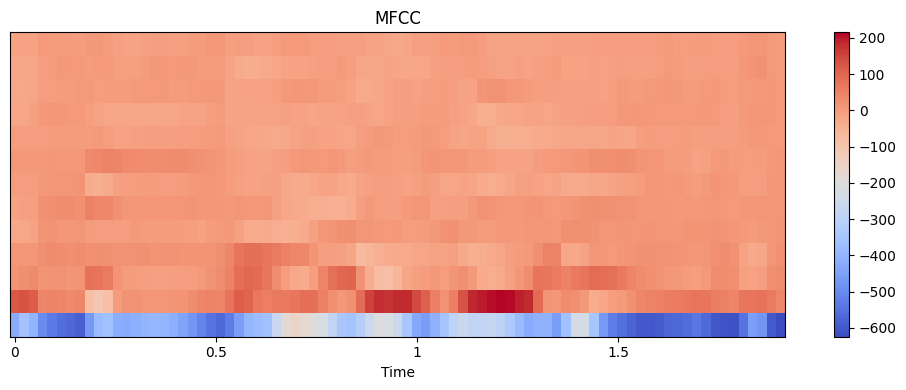

In [6]:
def extract_and_display_features(y, sr):
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    energy = np.sum(y ** 2) / len(y)

    print(f"Spectral Rolloff Mean: {np.mean(spectral_rolloff):.2f}")
    print(f"Energy: {energy:.5f}")

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfccs, x_axis='time')
    plt.colorbar()
    plt.title("MFCC")
    plt.tight_layout()
    plt.show()

# Usage example:
extract_and_display_features(y, sr)
def save_processed_audio(y, sr, output_path):
    librosa.output.write_wav(output_path, y, sr)
    print(f"Processed audio saved to '{output_path}'")

Visualizing Confirm_transaction.opus


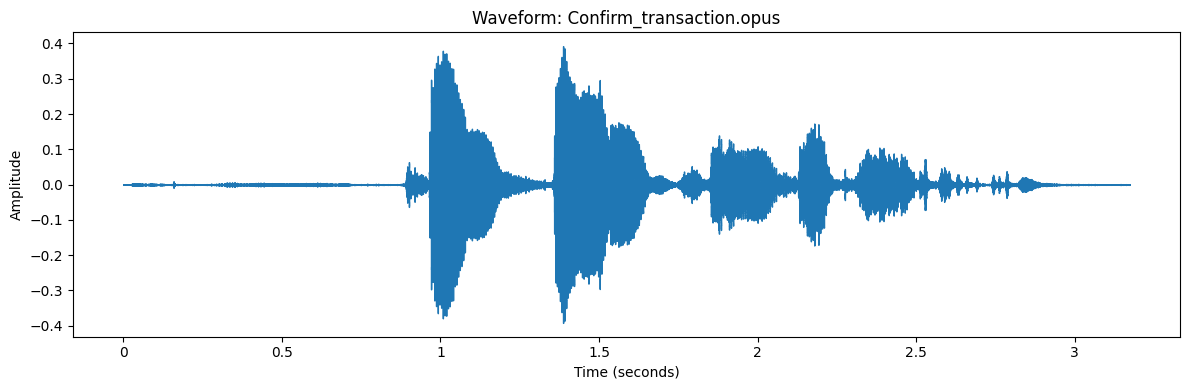

Visualizing Yes_approve.opus


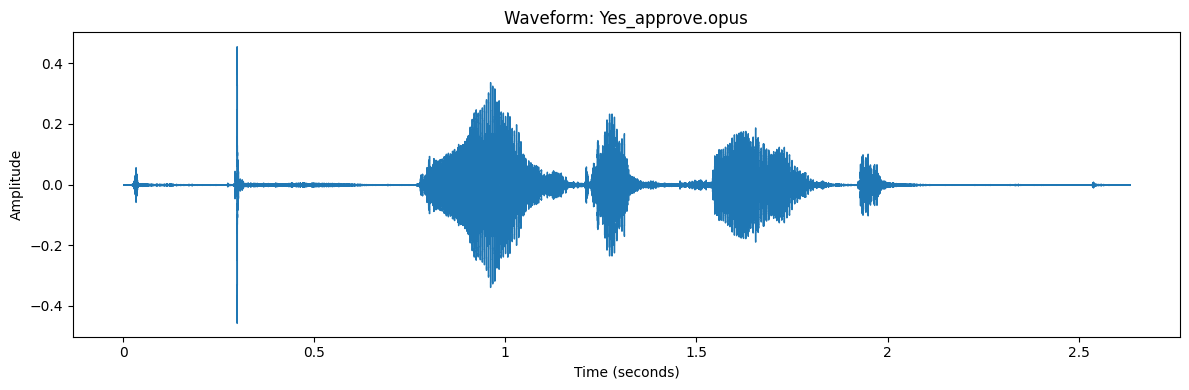

In [7]:
def visualize_audio_folder(audio_dir):
    for file in os.listdir(audio_dir):
        if file.lower().endswith(('.wav', '.opus')):
            print(f"Visualizing {file}")
            y, sr = librosa.load(os.path.join(audio_dir, file), sr=None)
            plot_waveform(y, sr, title=f"Waveform: {file}")

# Usage example:
visualize_audio_folder('../data/raw/audio/')
